### HW3 Q3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal as mvn
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### (a)

In [2]:
data = loadmat('data/data.mat')['data'].T
labels = loadmat('data/label.mat')['trueLabel'].T

m, n = data.shape
C = np.matmul(data.T, data)/m

In [3]:
# pca the data
d = 4  # reduced dimension
values, V = np.linalg.eig(C)
ind = np.argsort(values)[::-1][:d]
V = V[:, ind]

pdata = np.dot(data,V)

In [4]:
#two Gaussian mixtures
K = 2
#random seed
np.random.seed(55)

# initialize prior
pi = np.random.random(K)
pi = pi/np.sum(pi)

# initialize mean and covariance
mu = np.random.randn(K,4)
mu_old = mu.copy()

sigma = []
for ii in range(K):
    # to ensure the covariance psd
    dummy = np.random.randn(d, d)
    sigma.append(dummy@dummy.T)
    
# initialize the posterior
tau = np.full((m, K), fill_value=0.)

/Users/yuxi/anaconda3/lib/python3.10/site-packages/scipy/stats/_multivariate.py:494: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray(x, dtype=float)
/var/folders/sk/0cd35p691kq46qb_r1y3d5dr0000gn/T/ipykernel_46835/3308330829.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
/Users/yuxi/anaconda3/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


-----iteration---  0


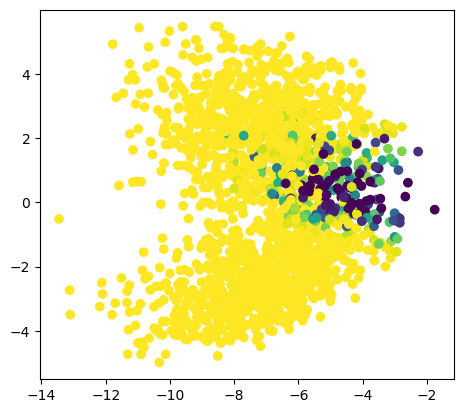

/Users/yuxi/anaconda3/lib/python3.10/site-packages/scipy/stats/_multivariate.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  cov = np.asarray(cov, dtype=float)


-----iteration---  1


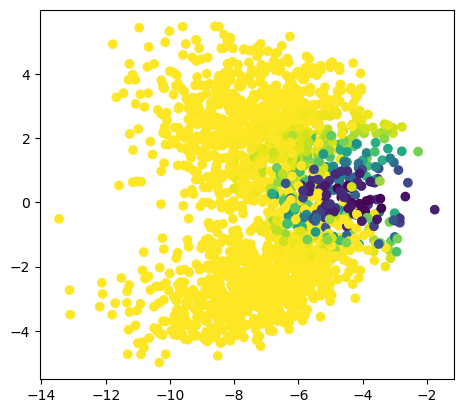

-----iteration---  2


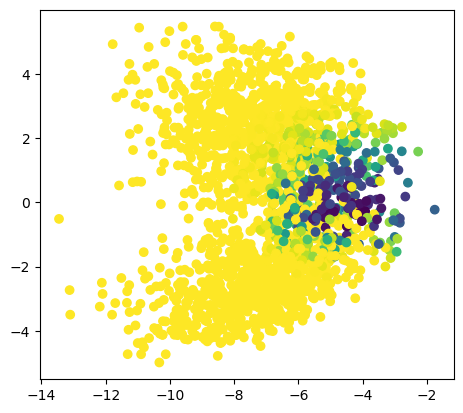

-----iteration---  3


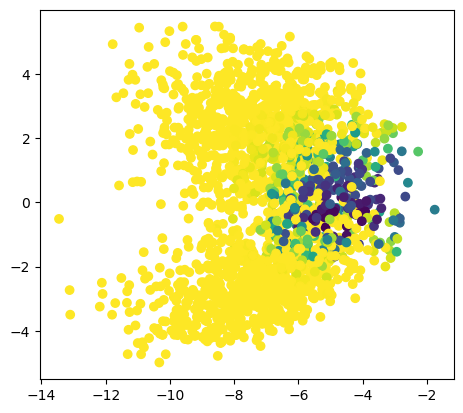

-----iteration---  4


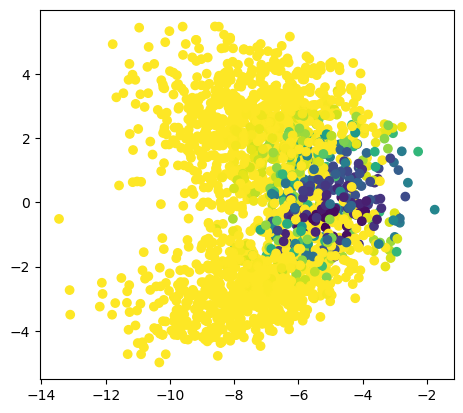

-----iteration---  5


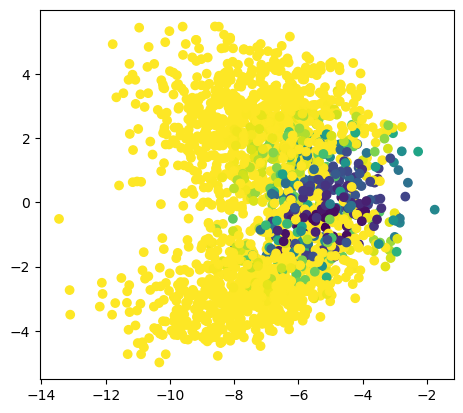

-----iteration---  6


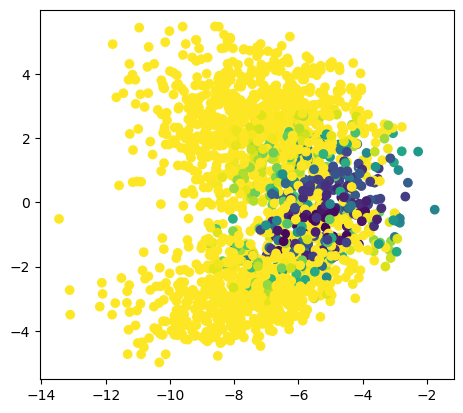

-----iteration---  7


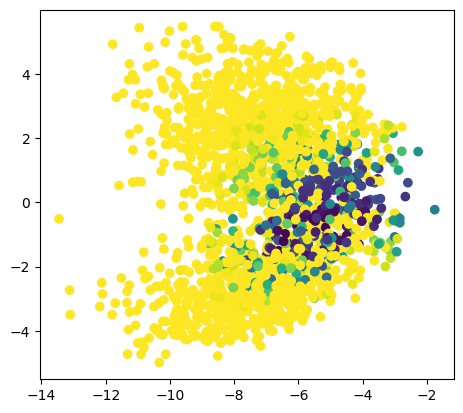

-----iteration---  8


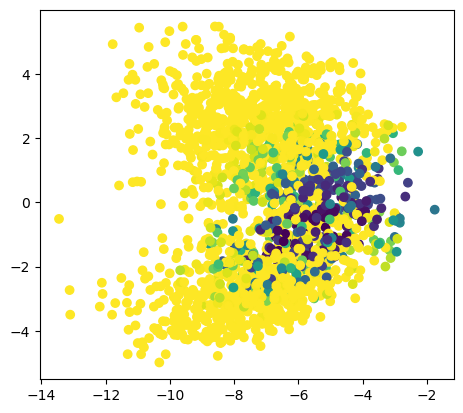

-----iteration---  9


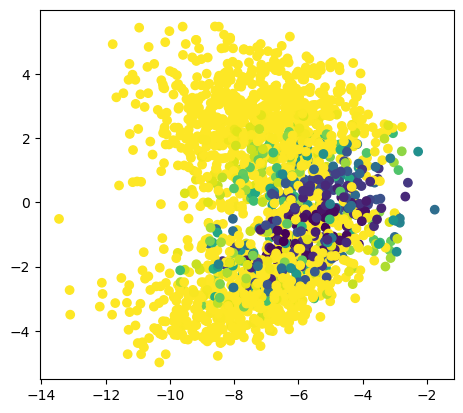

-----iteration---  10


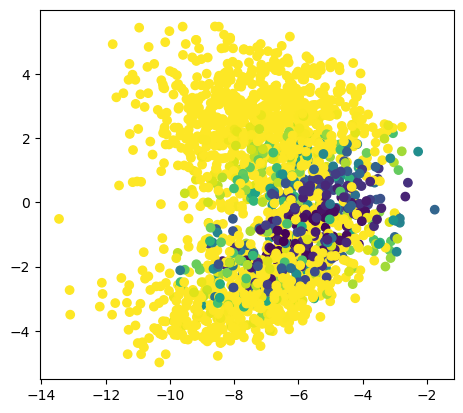

-----iteration---  11


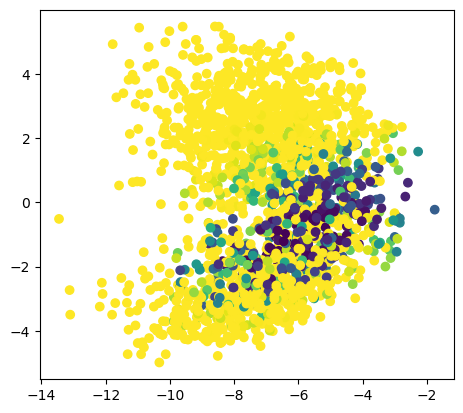

-----iteration---  12


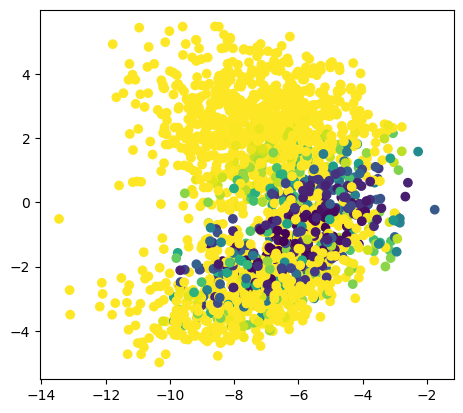

-----iteration---  13


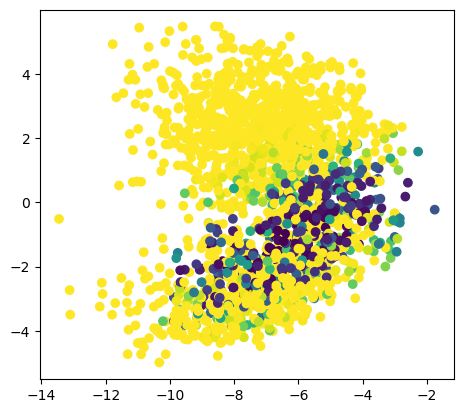

-----iteration---  14


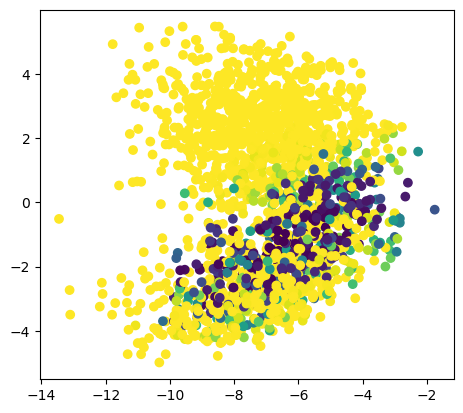

-----iteration---  15


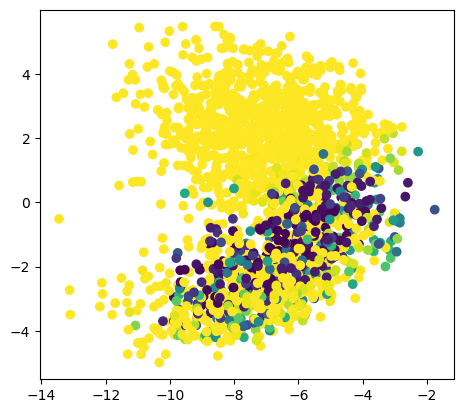

-----iteration---  16


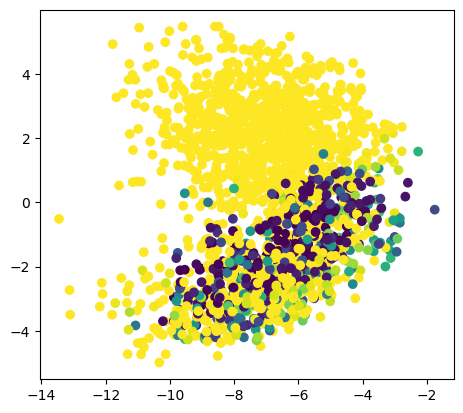

-----iteration---  17


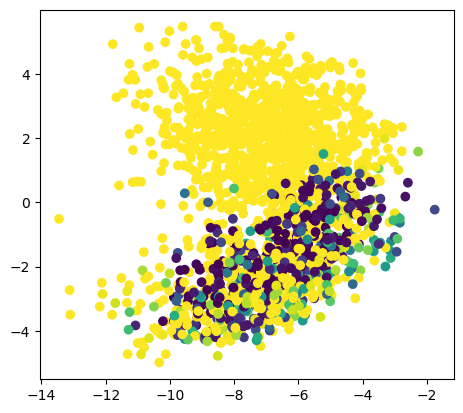

-----iteration---  18


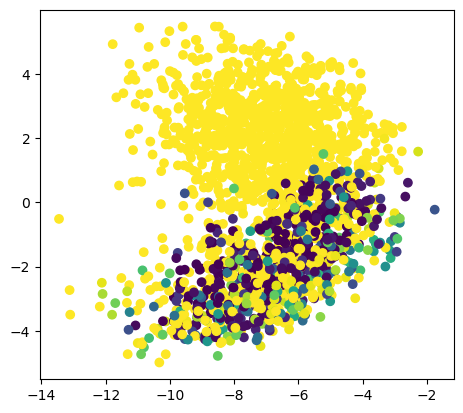

-----iteration---  19


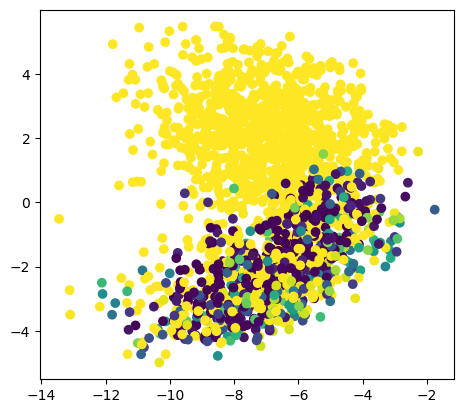

-----iteration---  20


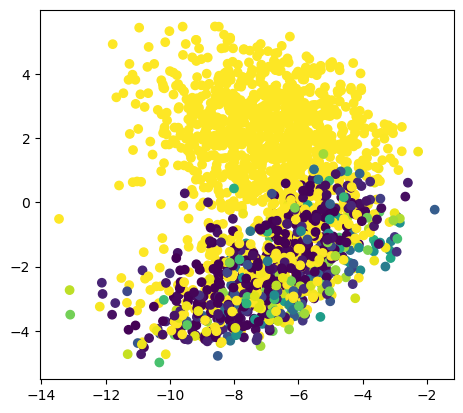

-----iteration---  21


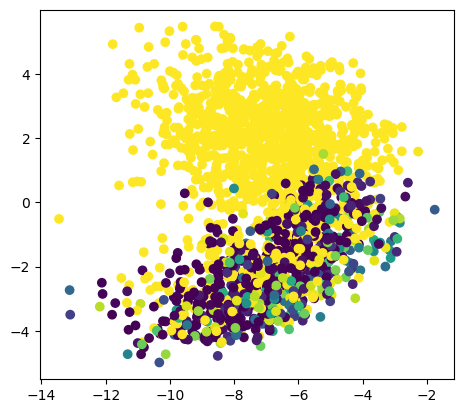

-----iteration---  22


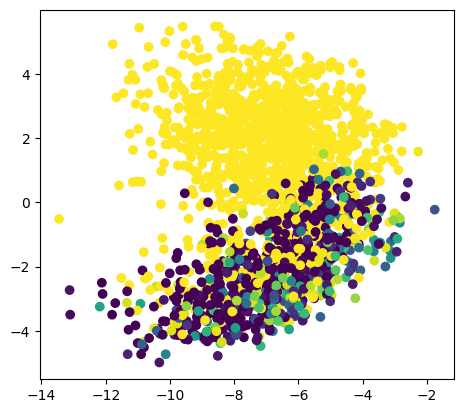

-----iteration---  23


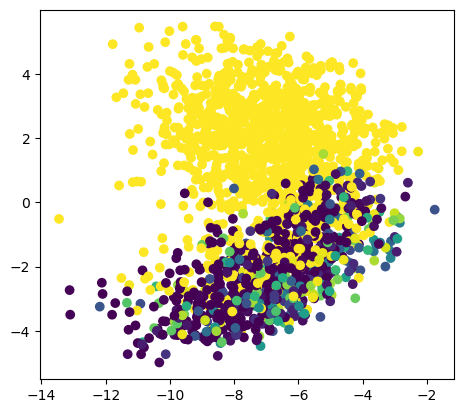

-----iteration---  24


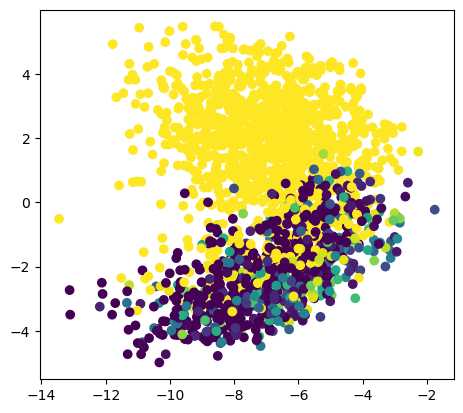

-----iteration---  25


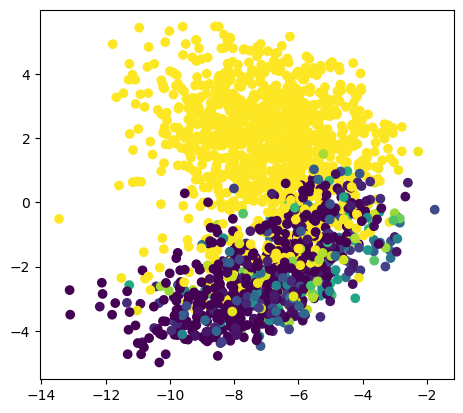

-----iteration---  26


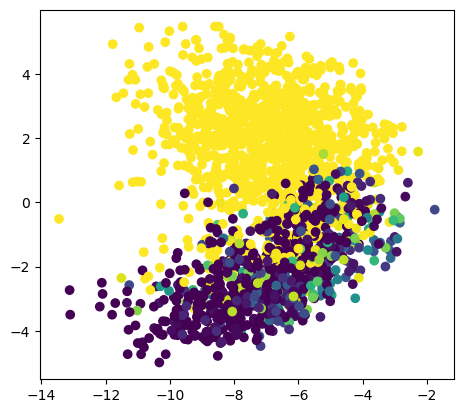

-----iteration---  27


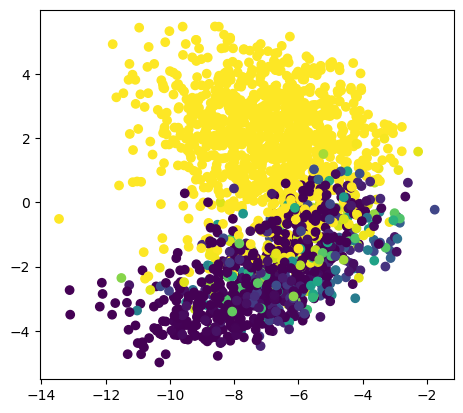

-----iteration---  28


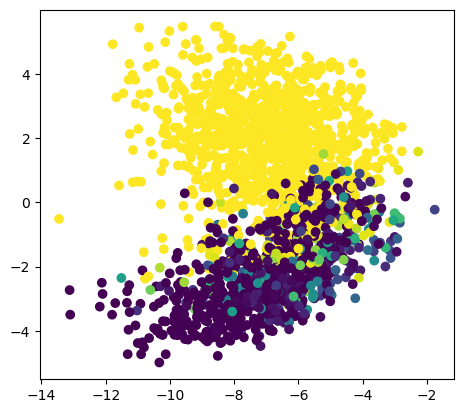

-----iteration---  29


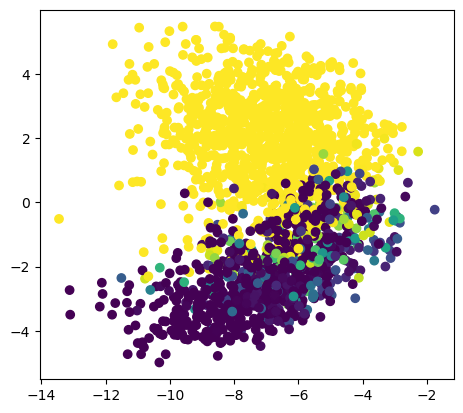

-----iteration---  30


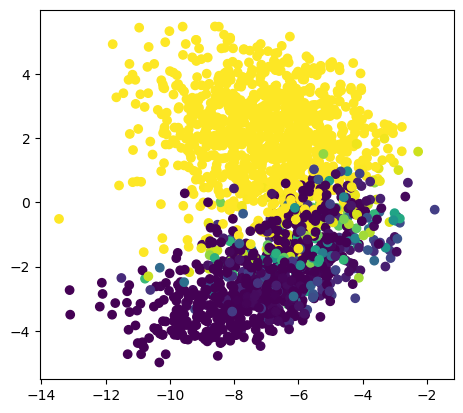

-----iteration---  31


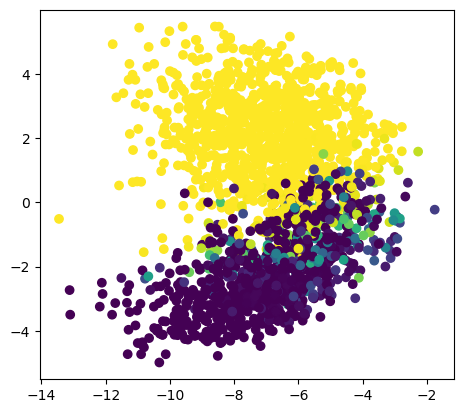

-----iteration---  32


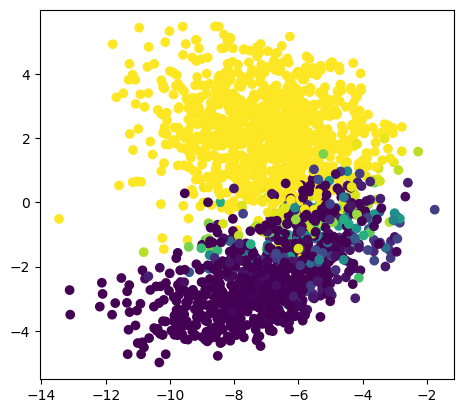

-----iteration---  33


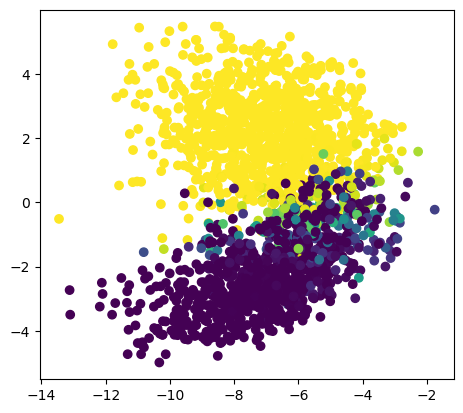

-----iteration---  34


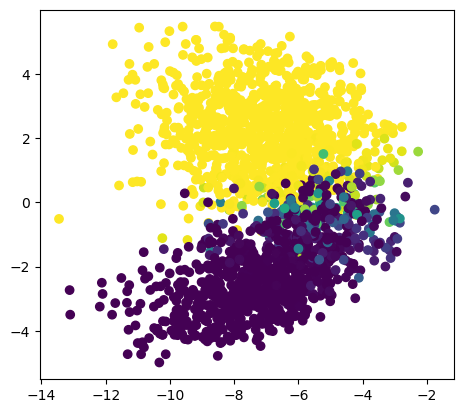

-----iteration---  35


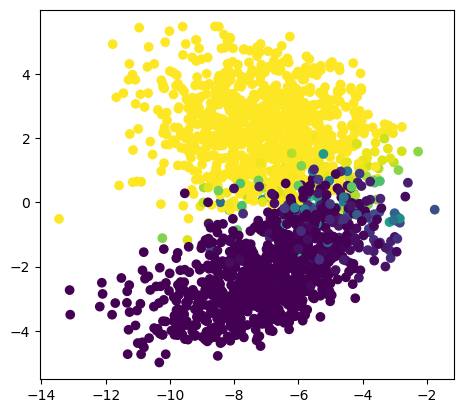

-----iteration---  36


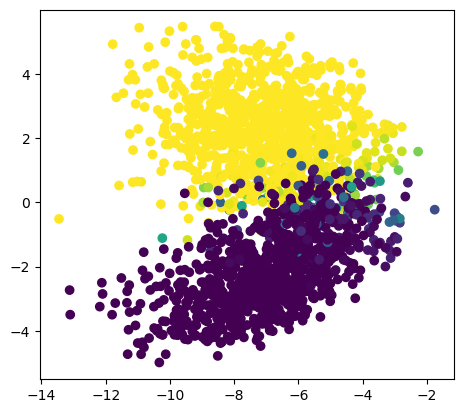

-----iteration---  37


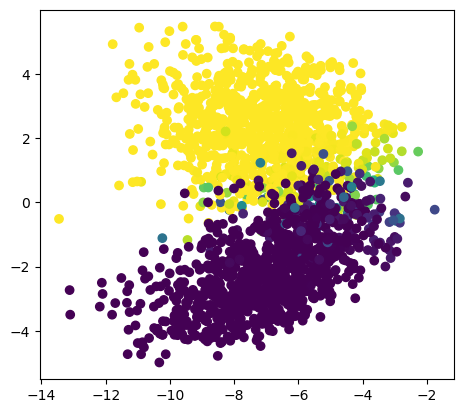

-----iteration---  38


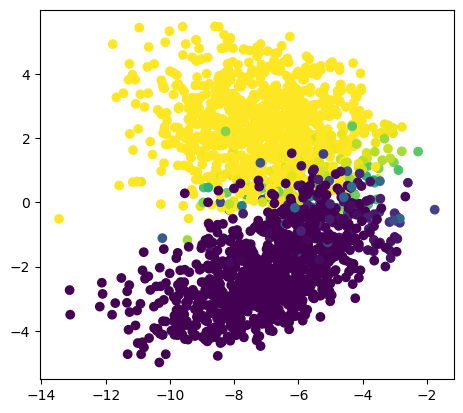

-----iteration---  39


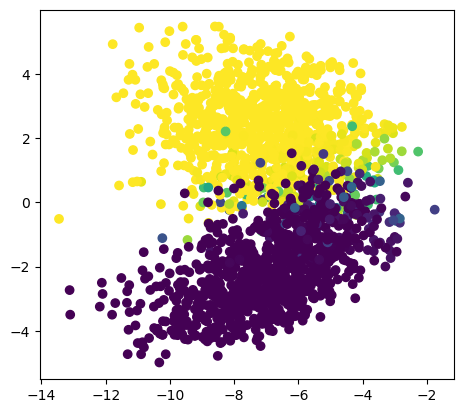

-----iteration---  40


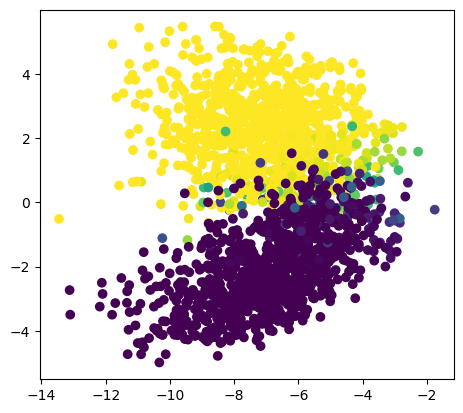

-----iteration---  41


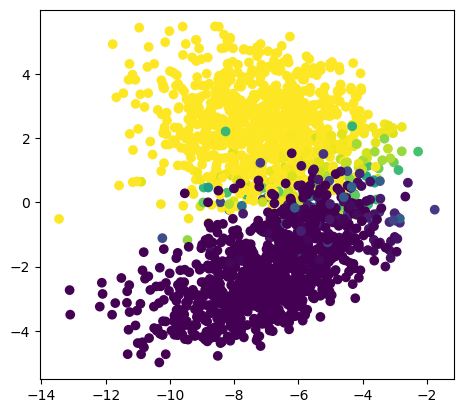

-----iteration---  42


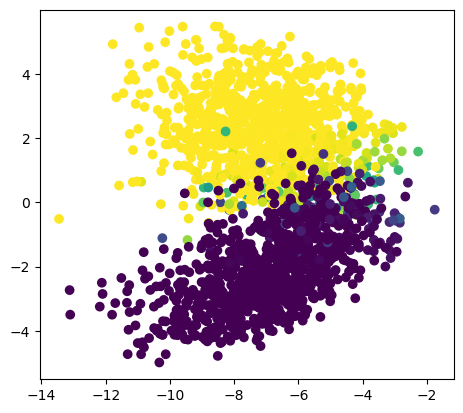

-----iteration---  43


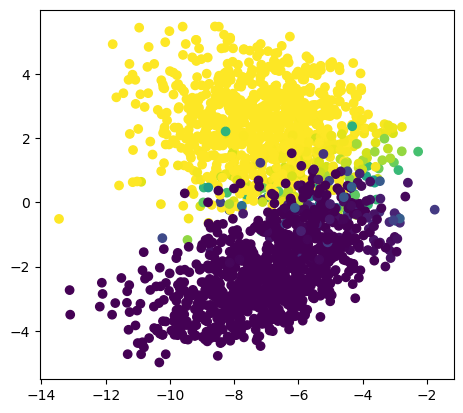

training coverged


In [5]:
#EM Algo
maxIter= 100
tol = 1e-3
ll = []

plt.ion()
    
for ii in range(maxIter):
    # E-step    
    for kk in range(K):
        tau[:, kk] = pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk])
    # normalize tau
    sum_tau = np.sum(tau, axis=1)
    sum_tau.shape = (m,1)    
    tau = np.divide(tau, np.tile(sum_tau, (1, K)))
    
    # M-step
    for kk in range(K):
        # update prior
        pi[kk] = np.sum(tau[:, kk])/m
        
        # update component mean
        mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
        
        # update cov matrix
        dummy = pdata - np.tile(mu[kk], (m,1)) # X-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)
    
    log_likelihood = np.sum(np.log(sum_tau))
    ll.append(log_likelihood)
        
    print('-----iteration--- ',ii)    
    plt.scatter(pdata[:,0], pdata[:,1], c = tau[:,0])
    plt.axis('scaled')
    plt.draw()
    plt.pause(0.1)
    
    if np.linalg.norm(mu-mu_old) < tol:
        print('training coverged')
        break
    mu_old = mu.copy()
    if ii==99:
        print('max iteration reached')
        break

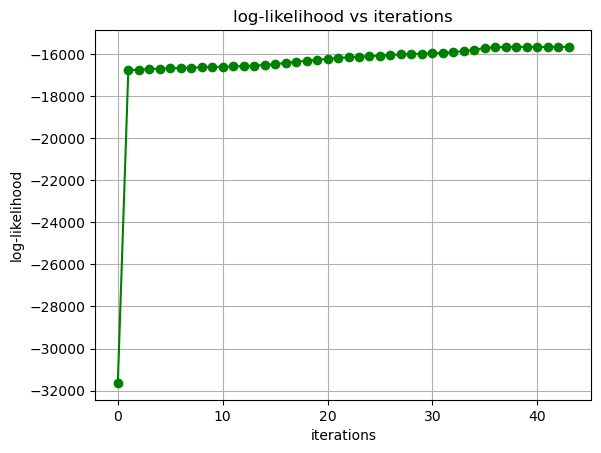

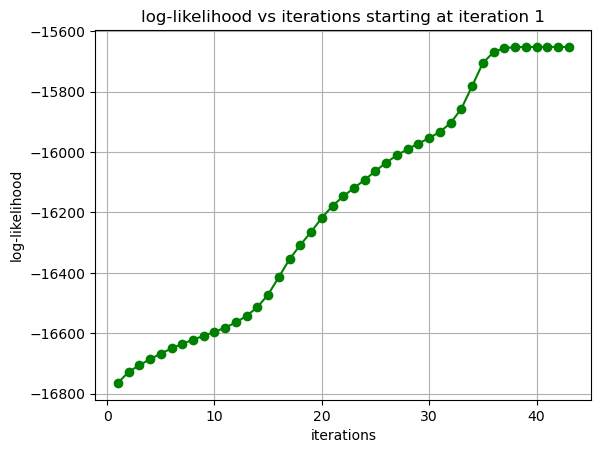

Converges in 43 iterations


In [6]:
iterations = list(range(0, ii+1))
plt.plot(iterations,ll, marker='o', linestyle='-', color='g')
plt.xlabel('iterations')
plt.ylabel('log-likelihood')
plt.title('log-likelihood vs iterations')
plt.grid()
plt.savefig('log_likelihood_1.png')
plt.show()

plt.plot(iterations[1:],ll[1:], marker='o', linestyle='-', color='g')
plt.xlabel('iterations')
plt.ylabel('log-likelihood')
plt.title('log-likelihood vs iterations starting at iteration 1')
plt.grid()
plt.savefig('log_likelihood_2.png')
plt.show()

print(f"Converges in {ii} iterations")

### (b)

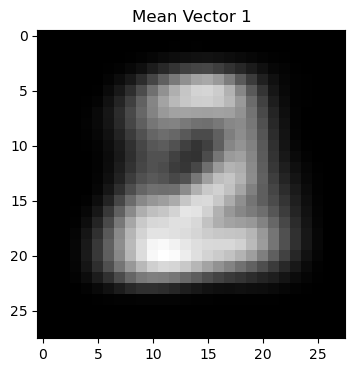

Component 1 has a weight of 0.48681869875450523


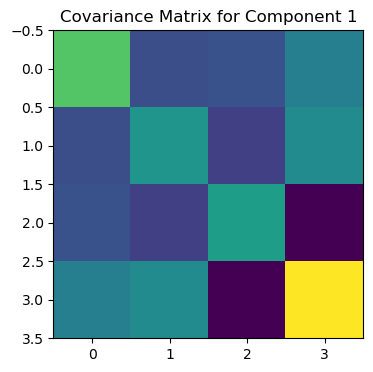

In [7]:
#reconstructed mean vectors
D = np.diag(np.sqrt(values[:d]))
mean_1 = np.real(V @ D @ mu[0])
comp_1 = mean_1.reshape(28, 28).T

plt.figure(figsize=(4, 4))
plt.imshow(comp_1, cmap='gray')
plt.title('Mean Vector 1')
plt.savefig('mean1.png')
plt.show()
print(f"Component 1 has a weight of {pi[0]}")

#heatmap
sigma_1 = np.real(sigma[0])

plt.figure(figsize=(4, 4))
plt.imshow(sigma_1, cmap='viridis', aspect='auto')
plt.title('Covariance Matrix for Component 1')
plt.savefig('heat1.png')
plt.show()

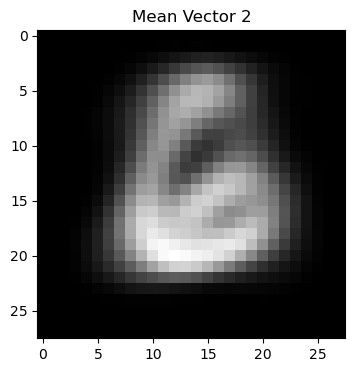

Component 2 has a weight of 0.5131813012454948


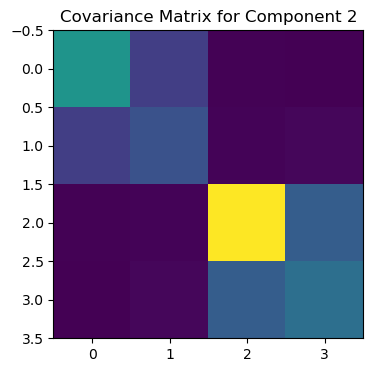

In [8]:
#reconstructed mean vectors
mean_2 = np.real(V @ D @ mu[1])
comp_2 = mean_2.reshape(28, 28).T

plt.figure(figsize=(4, 4))
plt.imshow(comp_2, cmap='gray')
plt.title('Mean Vector 2')
plt.savefig('mean2.png')
plt.show()
print(f"Component 2 has a weight of {pi[1]}")

#heatmap
sigma_2 = np.real(sigma[1])

plt.figure(figsize=(4, 4))
plt.imshow(sigma_2, cmap='viridis', aspect='auto')
plt.title('Covariance Matrix for Component 2')
plt.savefig('heat2.png')
plt.show()

### (c)

In [17]:
def misclass_rate(misclass, correct):
    total = misclass + correct
    rate = misclass/total
    return rate 

pdata = np.real(pdata)

 # GMM 
gmm = GaussianMixture(n_components=2, random_state=55)
gmm.fit(pdata)
gmm_labels = gmm.predict(pdata)

two_gmm = labels[gmm_labels == 0].T
correct_2_gmm = np.count_nonzero(two_gmm == 2)
misclass_2_gmm = np.count_nonzero(two_gmm == 6)


six_gmm = labels[gmm_labels == 1].T
misclass_6_gmm = np.count_nonzero(six_gmm == 2)
correct_6_gmm = np.count_nonzero(six_gmm == 6)

print(misclass_6)
print(correct_6)

misclass_2_gmm = misclass_rate(misclass_2_gmm, correct_2_gmm)
misclass_6_gmm = misclass_rate(misclass_6_gmm, correct_6_gmm)

# KMeans 
kmeans = KMeans(n_clusters=2, random_state=55)
kmeans.fit(pdata)
kmeans_labels = kmeans.labels_

two_km = labels[kmeans_labels == 0].T
correct_2_km = np.count_nonzero(two_km == 2)
misclass_2_km = np.count_nonzero(two_km == 6)

six_km = labels[kmeans_labels == 1].T
misclass_6_km = np.count_nonzero(six_km == 2)
correct_6_km = np.count_nonzero(six_km == 6)

misclass_2_kmeans = misclass_rate(misclass_2, correct_2)
misclass_6_kmeans = misclass_rate(misclass_6, correct_6)

print("GMM Misclassification Rates:")
print("Misclassification of 2:", misclass_2_gmm)
print("Misclassification of 6:", misclass_6_gmm)
print("")
print("K-Means Misclassification Rates:")
print("Misclassification of 2:", misclass_2_kmeans)
print("Misclassification of 6:", misclass_6_kmeans)

66
949
GMM Misclassification Rates:
Misclassification of 2: 0.009230769230769232
Misclassification of 6: 0.06502463054187192

K-Means Misclassification Rates:
Misclassification of 2: 0.07279693486590039
Misclassification of 6: 0.06765327695560254


/Users/yuxi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
